# GIGO

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UVADS/DS1001/blob/master/ddsbook/analytics-lab-IIa.ipynb)

**We are going to create a linear model using old faithful data to predict when the next eruption will take place. Then we are going to add Gaussian noise iteratively to a dataset and pass the new noisy dataset to a the same linear regression model and track the ability of the model to learn the target as noise increases.**

1. Read this brief wiki on garbage in garbage out: [article](https://en.wikipedia.org/wiki/Garbage_in,_garbage_out)  

2. Work through the below notebook, paying close attention to the comments and the outputs of the code. 

3. In the **Your Tasks** section, you will adjust the code to see how noise affects the model performance.

In [43]:
# pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm


In [44]:
# The dataset we will be using is a well known measure of eruption and wait times for old faithful. 
# Take a look at the documentation 
# here: https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/faithful


# This is our data source (.tsv == tab separated), here we are creating a variable that holds the url to the data.
# If you click the {x} in the ribbon to the left you will see the variables you have created.
url="https://gist.githubusercontent.com/curran/4b59d1046d9e66f2787780ad51a1cd87/raw/9ec906b78a98cf300947a37b56cfe70d01183200/data.tsv"


# Here we are reading in the data, and use the "tab" as a separator so the data will be loaded 
# in correctly.  pd stands for pandas and "pd.read_csv" is the function we are 
# using to read in the data from the url.
old_faith = pd.read_csv(url, sep='\t')


# Original Data

Let's take a quick look at a scatter plot to get an idea of the distribution of the data.

Remember this data is on eruptions of the Old Faithful Geyser in Yellowstone National Park. We can use the relationship between eruption time (x axis) and waiting time between eruptions (y axis) to predict how long it will be until the next eruption.

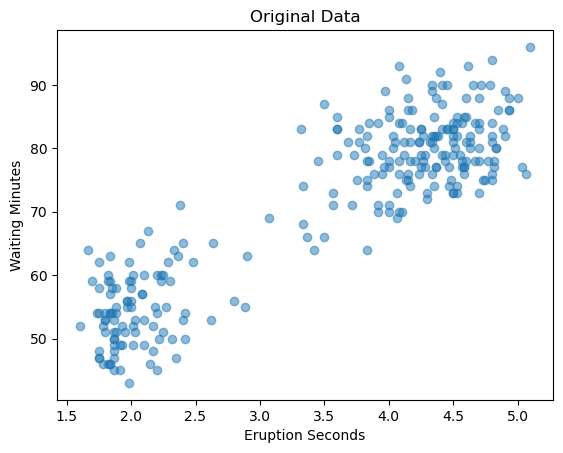

In [45]:
#plt (matplotlib.pyplot) is the library we are using to create our scatter plot.  We are using the "scatter" function, 
# and the alpha is the transparency of the dots.
plt.scatter(old_faith.eruptions, old_faith.waiting, alpha=0.5)
# here we are adding the labels to the x and y axis
plt.xlabel("Eruption Seconds")
plt.ylabel("Waiting Minutes")
plt.title("Original Data")

#this is the function that renders the plot
plt.show()

# Note the patterns that you see, (you'll need this for your submission) 

**\*Using the Scatter Plot above, answer Question 1\***

## First Model

Next lets build a linear regression model to predict Waiting Time based on Eruption Length

In [46]:
#Here we are using the statsmodels library to create a linear regression model. sm stands for statsmodels and OLS 
# stands for Ordinary Least Squares.  We are using the "fit" function to fit the model to the data.
lm = sm.OLS(old_faith['waiting'],old_faith['eruptions']).fit()

### First model output

In [47]:
# Now we are printing out the summary of the model (lm). The summary function will give you the R2 measure, along with 
# other measures of model fit. 
lm.summary()

#Using the R2 measure, how well does the model predict eruption length (scale of 0 to 1,
#  where 1 is perfect, again needed for your submission)?

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                waiting   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              9621.
Date:                Tue, 23 Jul 2024   Prob (F-statistic):                   9.97e-214
Time:                        15:15:44   Log-Likelihood:                         -1060.7
No. Observations:                 272   AIC:                                      2123.
Df Residuals:                     271   BIC:                                      2127.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eruptions     19.4019      0.198     98.086      0.000      19.013      19.791
==============================================================================
Omnibus:                       31.065   Durbin-Watson:                   2.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.019
Skew:                           0.148   Prob(JB):                      0.00667
Kurtosis:                       2.108   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**\*Using the Model Output above, answer Question 2\***

# Noisy Data

Now we are creating "noise" that aligns to a normal or gaussian distribution, thus gaussian noise, to add to the data.

In [66]:
#######################
## NOISE ADDING CELL ##
#######################


# mu= mean and sigma = standard deviation, these are the inputs you will be changing
mu, sigma = 0, 0.5 


# We need to create noise with the same dimensions as the dataset (272,2), this will allow us 
# to combine them easily
noise = np.random.normal(mu, sigma, [272,2])


# The print function will print the first 5 rows of the noise array 
print(noise[0:5])

[[-3.09386329  2.76674591]
 [ 0.09602142  1.22180388]
 [-0.88660826  3.87345801]
 [-0.77906879 -2.1486201 ]
 [-3.59835735  2.1075992 ]]


Now let's take a look at that same scatter plot but with the new data

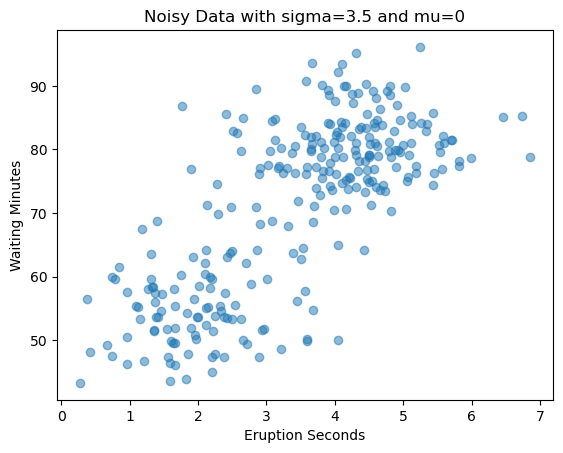

In [67]:
plt.scatter(old_faith_1.eruptions, old_faith_1.waiting, alpha=0.5)
plt.xlabel("Eruption Seconds")
plt.ylabel("Waiting Minutes")
plt.title(f"Noisy Data with sigma={sigma} and mu={mu}")

plt.show()

## Noisy Model

Now let's see what happens to model quality

In [68]:
# Here we are adding the noise to the dataset
old_faith_1=old_faith + noise

#Create a new model with the noise added to the data
lm_1 = sm.OLS(old_faith_1['waiting'],old_faith_1['eruptions']).fit()

### Noisy model output

In [69]:
#Checking the R2 number, note what happens.
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                waiting   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.431
Method:                 Least Squares   F-statistic:                              206.7
Date:                Tue, 23 Jul 2024   Prob (F-statistic):                    3.20e-35
Time:                        15:27:00   Log-Likelihood:                         -1472.6
No. Observations:                 272   AIC:                                      2947.
Df Residuals:                     271   BIC:                                      2951.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eruptions     10.0835      0.701     14.378      0.000       8.703      11.464
==============================================================================
Omnibus:                        0.519   Durbin-Watson:                   0.842
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.286
Skew:                          -0.029   Prob(JB):                        0.867
Kurtosis:                       3.148   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Your Tasks

In the "NOISE ADDING CELL", make the following changes and re-run the cell and all cells below it to observe how the $R^{2}$ number (model performance) changes.
<br />

#### Task 1: Increase the standard deviation in increments of .25, stopping at 3.5. Record the changes in a table. **\*After observing the model changes, answer Questions 3 & 4\***


#### Task 2: Set the standard deviation back to 0.5. Increase the mean using the same process as above. Record the changes in a table. **\*After observing the model changes, answer Question 5 & 6\***
